<a href="https://www.kaggle.com/code/suyashkapil/virat-kohli-hundreds?scriptVersionId=115491768" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [98]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/virat-kohli-100s/Virat_Kohli_100s.csv


# **His first 10 hundreds**

In [99]:
vk = pd.read_csv('/kaggle/input/virat-kohli-100s/Virat_Kohli_100s.csv')
vk.head(10)

,Number,Format,Inning,Position,Score,Balls,Strike Rate,Against,Venue,Host Nation,Series,Year,Team Total,Wickets lost,Not Out,MOTM,Win,Captain
0,1,ODI,2,4,107,114,93.859649,Sri Lanka,Kolkata,India,Bilateral,2009,316,3,No,No,Yes,No
1,2,ODI,2,3,102,95,107.368421,Bangladesh,Mirpur,Bangladesh,Tri-Series,2010,249,4,Yes,Yes,Yes,No
2,3,ODI,2,3,118,121,97.520661,Australia,Vizag,India,Bilateral,2010,292,5,No,Yes,Yes,No
3,4,ODI,1,3,105,104,100.961539,New Zealand,Guwahati,India,Bilateral,2010,276,10,No,Yes,Yes,No
4,5,ODI,1,4,100,83,120.481928,Bangladesh,Mirpur,Bangladesh,World Cup,2011,370,4,Yes,No,Yes,No
5,6,ODI,1,4,107,93,115.053763,England,Cardiff,England,Bilateral,2011,304,6,No,No,No,No
6,7,ODI,2,4,112,98,114.285714,England,Delhi,India,Bilateral,2011,238,2,Yes,Yes,Yes,No
7,8,ODI,2,4,117,123,95.121951,West Indies,Vizag,India,Bilateral,2011,270,5,No,Yes,Yes,No
8,9,Test,2,6,116,213,54.460094,Australia,Adelaide,Australia,Bilateral,2012,272,10,No,No,No,No
9,10,ODI,2,4,133,86,154.651163,Sri Lanka,Hobart,Australia,Tri-Series,2012,320,4,Yes,Yes,Yes,No


* Kohli had 9 ODI hundreds out of his first 10 international tons.
* 5 of the first 10 were hit at home while 2 each were hit at Australia and Bangladesh.
* All of these ODI tons resulted in a win for India except the sixth ton(107 vs England at Cardiff,England in 2011)
* His first test ton was at Adelaide, Australia in 2012.
* His first World Cup ton was hit in Bangladesh against Bangladesh.
* He won 6 Man Of The Match awards for these 10 tons.
* 6 out of his 9 ODI hundreds were hit chasing a target.

# **His hundreds year-wise**

Year
2009     1
2010     3
2011     4
2012     8
2013     6
2014     8
2015     4
2016    11
2017    11
2018    11
2019     8
2022     2
Name: Number, dtype: int64


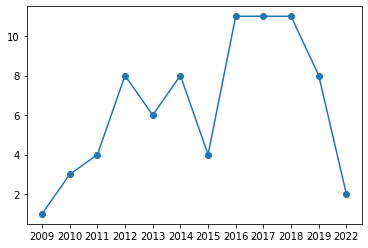

In [100]:
vk_year = vk.groupby('Year')
print(vk_year.count()['Number'])
year_tons = np.array(vk_year.count()['Number'])
year = np.array(['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2022'])
plt.plot(year,year_tons,'-o')

* Highest number of tons were hit by him in 2016,2017 and 2018 (11 each).
* 8 each were hit in 2012,2014 and 2019.
* He didn't hit any hundred in 2020 and 2021.

# **Hundreds in each format**

Format
ODI     44
T20      5
T20i     1
Test    27
Name: Number, dtype: int64


([<matplotlib.patches.Wedge at 0x7fb54606e110>,
 [Text(-0.24477291260077555, 1.0724207295912054, 'ODI'),
  Text(-0.8738259351127737, -0.6681528531139314, 'T20'),
  Text(-0.685838961418119, -0.8600144876691997, 'T20i'),
  Text(0.4973888205685588, -0.9811240294546956, 'Test')],
 [Text(-0.1335124977822412, 0.5849567615952028, '57.1%'),
  Text(-0.476632328243331, -0.3644470107894171, '6.5%'),
  Text(-0.3740939789553376, -0.469098811455927, '1.3%'),
  Text(0.2713029930373957, -0.5351585615207429, '35.1%')])

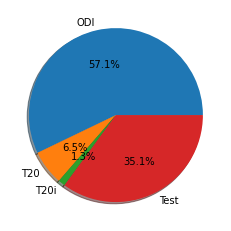

In [101]:
vk_for = vk.groupby('Format')
print(vk_for.count()['Number'])
vk_format = np.array(vk_for.count()['Number'])
for_perc = np.array((vk_format/vk_format.sum())*100)
format = np.array(['ODI','T20','T20i','Test'])
plt.pie(for_perc,labels = format,shadow=True, autopct='%1.1f%%')

* 57% of his Hundreds were hit in ODIs followed distantly by tests(35%).
* He has only 1 ton in T20i while he has 5 in the IPL in double the matches(4 in 2016).

# **Favorite opponent ?**

In [102]:
vk_opp = vk.groupby('Against')
vk_oppo = vk_opp.count()['Number']
vko = pd.DataFrame(vk_oppo)
vko

,Number
Against,
Afghanistan,1
Australia,15
Bangladesh,6
England,8
Gujarat Lions,2
Kings XI Punjab,1
Kolkata Knight Riders,1
New Zealand,8
Pakistan,2


* He has highest number of tons against Australia closely followed by Sri Lanka.
* He has 38 Hundreds against SENA countries out his 72 international hundreds.
* He has 2 tons against Gujarat Lions,his highest against a team in IPL.
* He has 2 tons against Pakistan(183 and 107). One in Asia Cup,other one in World Cup.
* His ton against Afghanistan is his only t20i ton.

# **How many as captain?**

Captain
No     31
Yes    46
Name: Number, dtype: int64


([<matplotlib.patches.Wedge at 0x7fb545fee490>,
 [Text(0.3313708250710568, 1.048901032648804, 'No'),
  Text(-0.3313709232762576, -1.0489010016236235, 'Yes')],
 [Text(0.180747722766031, 0.5721278359902566, '40.3%'),
  Text(-0.18074777633250413, -0.5721278190674309, '59.7%')])

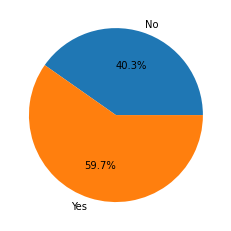

In [103]:
vk_cap = vk.groupby('Captain')
vkc=vk_cap.count()['Number']
print(vkc)
vkc_perc = vkc*50
plt.pie(vkc_perc,labels = ['No','Yes'], autopct='%1.1f%%')

* He has hit 60% of his hundreds across all formats as a captain.
* All his IPL hundreds came when he was the captain

# **How many Man Of The Match awards for his hundreds?**

MOTM
No     33
Yes    44
Name: Number, dtype: int64


([<matplotlib.patches.Wedge at 0x7fb545f41dd0>,
 [Text(0.2447730130080499, 1.0724207066739067, 'No'),
  Text(-0.2447729126007758, -1.0724207295912054, 'Yes')],
 [Text(0.1335125525498454, 0.5849567490948581, '43%'),
  Text(-0.13351249778224134, -0.5849567615952028, '57%')])

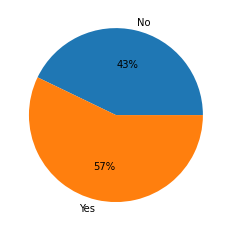

In [104]:
vk_motm = vk.groupby('MOTM').count()['Number']
print(vk_motm)
motm_perc = vk_motm*50
plt.pie(motm_perc,labels=['No','Yes'], autopct='%0.0f%%')

# **Favorite position to bat?**

Position
3       37
4       30
5        3
6        1
Open     6
Name: Number, dtype: int64


<BarContainer object of 5 artists>

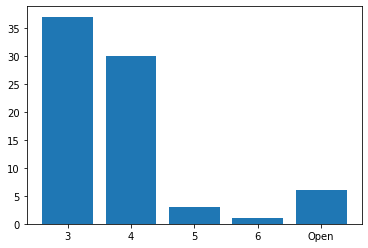

In [105]:
vk_pos = vk.groupby('Position')
pos = vk_pos.count()
print(pos['Number'])
plt.bar(['3','4','5','6','Open'],height = pos['Number'])

* All 6 of his t20 tons came when he played as an opener
* He bats usually at 4 in tests and 3 in ODIs. Initially, he batted lower the order.
* His first test ton was hit by him batting at number 6.
* He has hit 37 ODI tons batting at no.3 while 7 ODI tons at 4. He has 23 tons in tests batting at no.4 while 3 and 1 at no.5 and no.6 respectively.

# **Average Strike Rate of these Hundreds across the formats**

        Strike Rate
Format             
ODI      112.299950
T20      188.306533
T20i     200.000000
Test      65.731335


<BarContainer object of 4 artists>

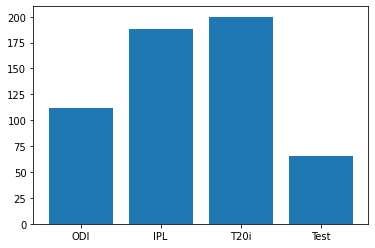

In [106]:
vk_sr = vk_for.mean()['Strike Rate']
print(pd.DataFrame(vk_sr))
plt.bar(['ODI','IPL','T20i','Test'],height= vk_for.mean()['Strike Rate'])

* His Hundreds were hit at really great pace across the formats.

# **How large are these tons?**

Format
ODI     120.636364
T20     106.000000
T20i    122.000000
Test    150.555556
Name: Score, dtype: float64


<BarContainer object of 4 artists>

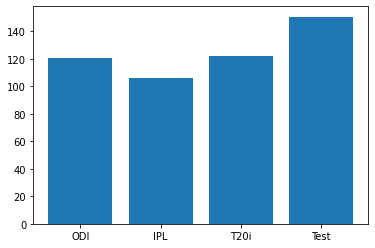

In [107]:
vk_sco=vk_for.mean()['Score']
print(vk_sco)
plt.bar(['ODI','IPL','T20i','Test'],height=vk_sco)

* He hits huge tons in tests with an average score of 151!
* The average score in tests is also skewed so high by his 7 double tons.
* His only hundred in t20i is 122 not out. Hence, his average score in t20i hundreds is 122.
* His IPL tons are 100,100,108,109,113.Hence, average is 106.

# **How many balls does he face for a ton on average?**

Format
ODI     110.045455
T20      56.800000
T20i     61.000000
Test    231.185185
Name: Balls, dtype: float64


<BarContainer object of 4 artists>

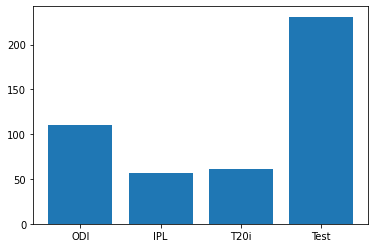

In [108]:
vk_ball = vk_for.mean()['Balls']
print(vk_ball)
plt.bar(['ODI','IPL','T20i','Test'],vk_ball)

* He faces a lot of balls on an average for his tons.

# **How many result in a win**

Win
Drawn     6
No       15
Tie       1
Yes      55
Name: Number, dtype: int64


([<matplotlib.patches.Wedge at 0x7fb545d23d90>,
 [Text(1.0672045527522955, 0.2665979043142932, 'Drawn'),
  Text(0.4973890789232768, 0.9811238984796236, 'No'),
  Text(-0.20082685811409956, 1.0815121696310308, 'Tie'),
  Text(-0.7481876641942984, -0.9381978571428737, 'Yes')],
 [Text(0.5821115742285248, 0.1454170387168872, '7.8%'),
  Text(0.2713031339581509, 0.5351584900797945, '19.5%'),
  Text(-0.10954192260769066, 0.589915728889653, '1.3%'),
  Text(-0.4364428041133407, -0.5472820833333429, '71.4%')])

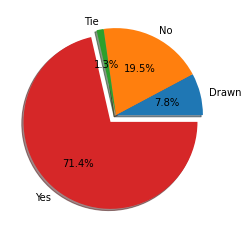

In [109]:
vk_win = vk.groupby('Win')
vkwc = vk_win.count()['Number']
print(vkwc)
vkwp = vkwc/0.77
plt.pie(vkwp,labels= ['Drawn','No','Tie','Yes'],autopct ='%0.1f%%',shadow=True,explode=[0,0,0,0.1])

* A large proportion of them(71%) have resulted in a win
* 6 out of his 27 test tons resulted in a draw.
* One of his 77 tons has resulted in a tie (it was against West Indies at Vizag in ODI (2018))

# **Highest Scores across formats**

Format
ODI     183
T20     113
T20i    122
Test    254
Name: Score, dtype: int64


<BarContainer object of 4 artists>

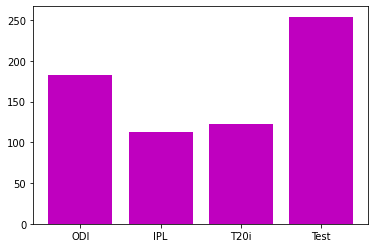

In [110]:
print(vk_for.max()['Score'])
plt.bar(['ODI','IPL','T20i','Test'],height=vk_for.max()['Score'],color='m')

* His ODI high score is 183 against Pakistan in 2012 Asia Cup chasing 330 which India eventually won by 6 wickets.
* His T20i high score too was in Asia Cup (122 not out against Afghanistan,2022) posting a target of 213 for Afghanistan and winning it by 101 runs.
* His IPL high score was 113 against Kings XI Punjab in 2016. The match was of 15 overs due to rain and RCB posted a target of 212 for KXIP to chase in 15 overs. RCB won by 82 runs after KXIP scored 120/9 in 14 overs before being again interrupted by rain.
* His 254 not out against South Africa in 2019 at Pune is the highest ever score by an Indian Captain in tests (followed by his 243,235 and MS Dhoni's 224)

# **first or second innings?**

In [111]:
print(vk_for.mean()['Inning'])

Format
ODI     1.590909
T20     1.200000
T20i    1.000000
Test    1.962963
Name: Inning, dtype: float64


* Mean being more than 1.5 in ODIs shows that majority of his ODI 100s came while chasing
* Mean being less than 1.5 means that in IPL, majority of his 100s came batting first.
* Mean of 1 shows that all his T20i 100s came batting first (122 not out is the only one)

# **ODI Chasemaster**

In ODIs :
          Inning  Number
1  Batting first      26
2        Chasing      18


([<matplotlib.patches.Wedge at 0x7fb545c22250>,
 [Text(-0.30990572269135597, 1.055442297353649, 'Batting first'),
  Text(0.3099056238737145, -1.0554423263691124, 'Chasing')],
 [Text(-0.16903948510437597, 0.5756957985565357, '59.1%'),
  Text(0.16903943120384426, -0.5756958143831521, '40.9%')])

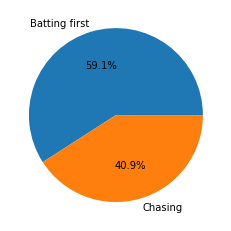

In [112]:
odi_ch = vk[(vk.Format=='ODI')&(vk.Inning==2)].count()['Number']
odi_fi = vk[(vk.Format=='ODI')&(vk.Inning==1)].count()['Number']
print('In ODIs :')
vk_in = pd.DataFrame({'Inning':['Batting first','Chasing'],'Number':[odi_ch,odi_fi]},index=[1,2])
print(vk_in)
plt.pie(vk_in['Number'],labels=vk_in['Inning'],autopct='%0.1f%%')

* 60% of his 100s in ODI are while chasing (includes his high score 183)

# **Favorite Nation to play in?**

              Number  Percentage
Host Nation                     
Australia         11   14.285714
Bangladesh         6    7.792208
England            3    3.896104
India             35   45.454545
New Zealand        4    5.194805
South Africa       5    6.493506
Sri Lanka          6    7.792208
UAE                1    1.298701
West Indies        5    6.493506
Zimbabwe           1    1.298701


([<matplotlib.patches.Wedge at 0x7fb545bf8c50>,
 [Text(0.9910657451172095, 0.47727213291294374, 'AUS'),
  Text(0.4569564802357173, 1.000595210447554, 'BAN'),
  Text(0.0672777995360949, 1.097940662189711, 'ENG'),
  Text(-1.096339846521708, 0.08966014124881598, 'IND'),
  Text(-0.06727770958904856, -1.0979406677013344, 'NZ'),
  Text(0.3313709232762572, -1.0489010016236238, 'SA'),
  Text(0.7536559714693666, -0.8012506952686939, 'SL'),
  Text(0.9488660127922254, -0.5564649941980038, 'UAE'),
  Text(1.055442302794049, -0.30990570416304924, 'WI'),
  Text(1.0990845840066326, -0.0448673288592908, 'ZIM')])

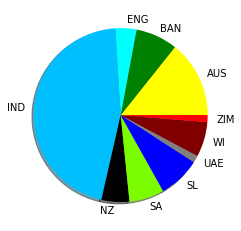

In [113]:
vk_gro = pd.DataFrame(vk.groupby('Host Nation').count()['Number'])
vkgp = vk_gro['Number']/0.77
vk_gro['Percentage']=vkgp
print(vk_gro)
nat_abr = ['AUS','BAN','ENG','IND','NZ','SA','SL','UAE','WI','ZIM']
colors=['yellow','g','cyan','deepskyblue','black','lawngreen','blue','grey','maroon','red']
plt.pie(vk_gro['Number'],labels=nat_abr,colors=colors,shadow=True)

* He has 23 hundreds in SENA countries(SA,ENG,NZ,AUS)
* He has hit 55% of his tons outside India
* He has never played a match in Pakistan
* Apart from India, he has hit most tons in Australia(6 in Adelaide,Australia)

# **Favorite City**

In [114]:
vk_ven = vk.groupby('Venue').count()['Number'].sort_values(ascending=False).head(10)
print(vk_ven)

Venue
Adelaide         5
Mirpur           4
Bengaluru        4
Nagpur           4
Kolkata          4
Colombo          3
Pune             3
Port Of Spain    3
Vizag            3
Chennai          2
Name: Number, dtype: int64


* Top 10 cities shown above. Adelaide is closely followed by Mirpur,Nagpur,Kolkata and Bengaluru.
* 3 of his 5 IPL tons were hit at Chinnaswamy Stadium,Bengaluru.
* His World Cup Hundreds were hit at Mirpur(vs Bangladesh in 2011) and Adelaide(vs Pakistan in 2015)
* His ODI high score was hit at Mirpur,Bangladesh(183 vs Pakistan in Asia Cup 2012) while his Test high score was hit at Pune,India(254 not out against South Africa in 2019)

# **Series He made his tons in**

Series
Asia Cup       4
Bilateral     63
IPL            5
Tri-Series     3
World Cup      2
Name: Number, dtype: int64


([<matplotlib.patches.Wedge at 0x7fb545b17950>,
 [Text(1.0853837207575823, 0.1787237497212573, 'Asia Cup'),
  Text(-1.067204546512121, 0.26659792929401877, 'Bilateral'),
  Text(0.9003515932576855, -0.6319549101940323, 'IPL'),
  Text(1.0554422610843068, -0.3099058462134038, 'Tri-Series'),
  Text(1.0963398376024527, -0.08966025031098131, 'World Cup')],
 [Text(0.5920274840495903, 0.09748568166614034, '5.2%'),
  Text(-0.5821115708247931, 0.14541705234219204, '81.8%'),
  Text(0.4911008690496466, -0.34470267828765394, '6.5%'),
  Text(0.5756957787732583, -0.1690395524800384, '3.9%'),
  Text(0.5980035477831559, -0.04890559107871707, '2.6%')])

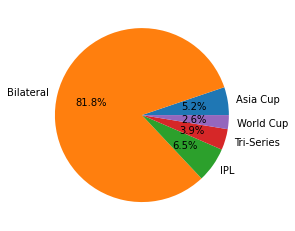

In [115]:
vk_ser = vk.groupby('Series').count()['Number']
print(vk_ser)
plt.pie(vk_ser,labels=vk_ser.index,autopct='%0.1f%%')

* He hasn't hit a 100 in Champions Trophy(highest 96 not out vs Bangladesh in 2017 semi-final) and T20 World Cup(highest 89 not out against West Indies in 2016 semi-final)
* A whopping 81.8% of his tons were hit in Bilaterals followed by 6.5% in IPL and 5.2% in Asia Cup
* All test hundreds were hit in Bilaterals. He has played only 1 test besides Bilaterals( World Test Championship 2021 Final)

# **Double Hundreds**

In [116]:
vk_200 = vk[vk.Score >= 200]
vk_200

,Number,Format,Inning,Position,Score,Balls,Strike Rate,Against,Venue,Host Nation,Series,Year,Team Total,Wickets lost,Not Out,MOTM,Win,Captain
40,41,Test,1,4,200,283,70.671378,West Indies,North Sound,West Indies,Bilateral,2016,566,8,No,No,Yes,Yes
41,42,Test,1,4,211,366,57.650273,New Zealand,Indore,India,Bilateral,2016,557,5,No,No,Yes,Yes
44,45,Test,2,4,235,340,69.117647,England,Mumbai,India,Bilateral,2016,631,10,No,Yes,Yes,Yes
46,47,Test,1,4,204,246,82.926829,Bangladesh,Hyderabad,India,Bilateral,2017,687,6,No,Yes,Yes,Yes
54,55,Test,2,4,213,267,79.775281,Sri Lanka,Nagpur,India,Bilateral,2017,610,6,No,Yes,Yes,Yes
55,56,Test,1,4,243,287,84.668990,Sri Lanka,Delhi,India,Bilateral,2017,536,7,No,Yes,Drawn,Yes
73,74,Test,1,4,254,336,75.595238,South Africa,Pune,India,Bilateral,2019,601,5,Yes,Yes,Yes,Yes


In [117]:
print('All of his 200s were hit in test matches')
print('Average Strike Rate when he hits a Double Ton :{}'.format(np.mean(vk_200['Strike Rate'])))

All of his 200s were hit in test matches
Average Strike Rate when he hits a Double Ton :74.34366231285715


Against
Bangladesh      1
England         1
New Zealand     1
South Africa    1
Sri Lanka       2
West Indies     1
Name: Number, dtype: int64


([<matplotlib.patches.Wedge at 0x7fb545a8f6d0>,
 [Text(0.9910657451172095, 0.47727213291294374, 'Bangladesh'),
  Text(0.24477296280441296, 1.0724207181325571, 'England'),
  Text(-0.68583886831644, 0.8600145619153347, 'New Zealand'),
  Text(-1.0999999999999892, -1.5448414893833034e-07, 'South Africa'),
  Text(-0.24477281219349967, -1.0724207525084946, 'Sri Lanka'),
  Text(0.9910658791734962, -0.47727185454211024, 'West Indies')],
 [Text(0.5405813155184778, 0.2603302543161511, '14%'),
  Text(0.13351252516604342, 0.5849567553450311, '14%'),
  Text(-0.3740939281726036, 0.46909885195381884, '14%'),
  Text(-0.5999999999999941, -8.426408123908927e-08, '14%'),
  Text(-0.13351244301463616, -0.5849567740955425, '29%'),
  Text(0.5405813886400888, -0.26033010247751465, '14%')])

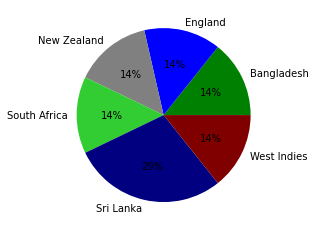

In [118]:
vk200_opp = vk_200.groupby('Against').count()['Number']
print(vk200_opp)
plt.pie(vk200_opp,labels=vk200_opp.index,colors=['g','b','gray','limegreen','navy','maroon'],autopct='%0.0f%%')

In [119]:
print(vk_200.groupby('Win').count()['Number'])
print(vk_200.groupby('Captain').count()['Number'])
print(vk_200.groupby('MOTM').count()['Number'])
print(vk_200.groupby('Not Out').count()['Number'])
print(vk_200.groupby('Host Nation').count()['Number'])

Win
Drawn    1
Yes      6
Name: Number, dtype: int64
Captain
Yes    7
Name: Number, dtype: int64
MOTM
No     2
Yes    5
Name: Number, dtype: int64
Not Out
No     6
Yes    1
Name: Number, dtype: int64
Host Nation
India          6
West Indies    1
Name: Number, dtype: int64


* Kohli had hit two consecutive 200s against Sri Lanka as a captain in 2017.
* India has never lost a test match when Kohli made a 200.
* All his 200s were hit when he was the captain of the team.
* His 254 against South Africa is the only 200 when he didn't get out.
* He was awarded Man Of The Match award for 5 of his 7 double tons.
* His first 200 came away from home. 6 of his 7 double tons were hit at home.
* His 2nd 200 was hit next to his first 200 (they were his 42nd and 41st ton respectively) but they weren't consecutive.


# **Top 10 high scores in ODIs**

In [120]:
vk_hi = vk[(vk.Format=='ODI')].sort_values(by=['Score'],ascending=False).head(10)
vk_hi

,Number,Format,Inning,Position,Score,Balls,Strike Rate,Against,Venue,Host Nation,Series,Year,Team Total,Wickets lost,Not Out,MOTM,Win,Captain
11,12,ODI,2,3,183,148,123.648649,Pakistan,Mirpur,Bangladesh,Asia Cup,2012,330,4,No,Yes,Yes,No
58,59,ODI,1,3,160,159,100.628931,South Africa,Cape Town,South Africa,Bilateral,2018,303,6,Yes,Yes,Yes,Yes
64,65,ODI,1,3,157,129,121.705426,West Indies,Viazg,India,Bilateral,2018,321,6,Yes,Yes,Tie,Yes
42,43,ODI,2,3,154,134,114.925373,New Zealand,Mohali,India,Bilateral,2016,289,3,Yes,Yes,Yes,No
63,64,ODI,2,3,140,107,130.841122,West Indies,Guwahati,India,Bilateral,2018,326,2,No,Yes,Yes,Yes
26,27,ODI,2,4,139,126,110.317460,Sri Lanka,Ranchi,India,Bilateral,2014,288,3,Yes,No,Yes,Yes
33,34,ODI,1,3,138,140,98.571429,South Africa,Chennai,India,Bilateral,2015,299,8,No,Yes,Yes,No
24,25,ODI,2,3,136,122,111.475410,Bangladesh,Fatullah,Bangladesh,Asia Cup,2014,280,4,No,Yes,Yes,Yes
9,10,ODI,2,4,133,86,154.651163,Sri Lanka,Hobart,Australia,Tri-Series,2012,320,4,Yes,Yes,Yes,No
49,50,ODI,1,3,131,96,136.458333,Sri Lanka,Colombo,Sri Lanka,Bilateral,2017,375,5,No,Yes,Yes,Yes


Inning
1    4
2    6
Name: Number, dtype: int64
Host Nation
Australia       1
Bangladesh      2
India           5
South Africa    1
Sri Lanka       1
Name: Number, dtype: int64


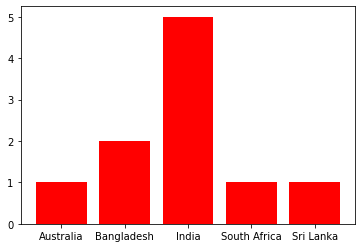

In [121]:
vk_hi_in = vk_hi.groupby('Inning').count()['Number']
print(vk_hi_in)
vk_hi_ven = vk_hi.groupby('Host Nation').count()['Number']
print(vk_hi_ven)
plt.bar(x=vk_hi_ven.index,height=vk_hi_ven,color='r')
vk_hi_opp =vk_hi.groupby('Against').count()['Number']

Against
Bangladesh      1
New Zealand     1
Pakistan        1
South Africa    2
Sri Lanka       3
West Indies     2
Name: Number, dtype: int64


<BarContainer object of 6 artists>

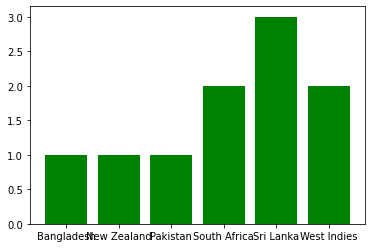

In [122]:
print(vk_hi_opp)
plt.bar(x=vk_hi_opp.index,height=vk_hi_opp,color='g')

* 5 of his top 10 odi high scores were hit in India followed by 2 in Bangladesh.
* 6 of them were hit while chasing.
* 3 of these 10 scores are against Sri Lanka, closely followed by South Africa and West Indies( 2 each).
* 2 of these 10 were hit in SENA countries(SA,ENG,NZ,AUS).
* 9 of these 10 were hit with a strike rate above 100( strike rate 98.57 is the slowest among these, it was 138 in 140 against South Africa at Chennai).
* 4 of these 10 are scores of 150+.
* 9 of these 10 came in winning cause, 1 in tie.
* Kohli was awarded MOTM for 9 of these innings.(The only time he wasn't awarded MOTM was for his 139 against Sri Lanka. Angelo Mathews was awarded MOTM for his 139 in 116 and 2 for 33)

# **Contribution to team total**

In [123]:
vk_perc = pd.DataFrame(vk['Score']/vk['Team Total']*100)
vk_perc.columns=['Percentage']
print(vk_perc)
print('Average percentage')
np.mean(vk_perc)

    Percentage
0    33.860759
1    40.963855
2    40.410959
3    38.043478
4    27.027027
..         ...
72   44.531250
73   42.262895
74   39.193084
75   57.547170
76   27.628362

[77 rows x 1 columns]
Average percentage


Percentage    40.842383
dtype: float64

In [132]:
vk_perc_asc = vk_perc.sort_values(by='Percentage')
vk_perc_asc

,Percentage
16,18.706294
62,21.417565
27,25.900901
4,27.027027
32,27.466667
...,...
11,55.454545
36,55.555556
75,57.547170
59,62.621359


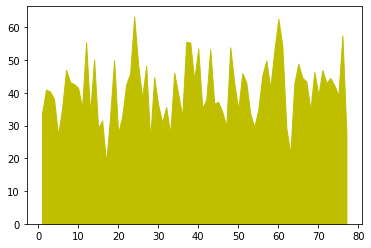

In [159]:
plt.stackplot(np.arange(1,78,1),vk_perc['Percentage'],color='y')

In [161]:
print('Number of times he has scored a ton which contributed the majority of runs to the team total')
vk_perc[(vk_perc.Percentage>=50)].count()

Number of times he has scored a ton which contributed the majority of runs to the team total


Percentage    13
dtype: int64

In [125]:
vk.iloc[16,:]

Number                 17
Format               Test
Inning                  2
Position                5
Score                 107
Balls                 206
Strike Rate     51.941748
Against         Australia
Venue             Chennai
Host Nation         India
Series          Bilateral
Year                 2013
Team Total            572
Wickets lost           10
Not Out                No
MOTM                   No
Win                   Yes
Captain                No
Name: 16, dtype: object

In [126]:
vk.iloc[23,:]

Number                   24
Format                 Test
Inning                    4
Position                  4
Score                   105
Balls                   135
Strike Rate       77.777778
Against         New Zealand
Venue            Wellington
Host Nation     New Zealand
Series            Bilateral
Year                   2014
Team Total              166
Wickets lost              3
Not Out                 Yes
MOTM                     No
Win                   Drawn
Captain                  No
Name: 23, dtype: object

* On an average across all formats, Kohli's ton makes up 41% of team score
* His 17th ton was the one with least contribution to team score(18.7%). It was against Australia at Chennai,India in a test match in 2013. His score being 107 while India raking up 572.It resulted in a win for India.
* His 24th ton was the one with highest contribution to the team total. This inning was in a 2014 test match against New Zealand at Wellington,New Zealand where he made 63% of the team runs. He contributed 105 to the total of 166 for 3. The match was drawn.
* His tons contributed more than or equal to 50% of the team total 13 times.